In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [216]:
data = pd.read_csv('dataset/coffee_machine_performance_final.csv')
data.head()

,Store_ID,Machine_ID,Machine_Model,Total_Sales,Coffee_Type,Days_In_Operation,Avg_Daily_Processes,Duration_Per_Request,Total_Minutes_Per_Day,Total_Hours_Per_Day,Maintenance_Needed,Last_Maintenance_Date,Utilization_Rate,Avg_Error_Per_Day
0,Store_D,Machine_93,Drip_Brew_3000,6234,Cappuccino,101,61.72,2.51,154.9172,2.58,True,2/1/2025,10.75,0.0396
1,Store_D,Machine_24,Drip_Brew_3000,7449,Cold Brew,287,25.95,0.50,12.9750,0.22,False,2/10/2025,0.92,0.0035
2,Store_E,Machine_89,Espresso_X,3058,Cappuccino,88,34.75,1.13,39.2675,0.65,False,2/1/2025,2.71,0.0227
3,Store_D,Machine_55,ColdBrew_Pro,4056,Espresso,160,25.35,NaN,81.8805,1.36,False,1/15/2025,5.67,0.0188
4,Store_A,Machine_60,Latte_Maker,8013,Latte,294,27.26,0.94,25.6244,0.43,False,2/1/2025,1.79,0.0102


In [217]:
data['Store_ID'].unique()

array(['Store_D', 'Store_E', 'Store_A', 'Store_C', 'Store_B'],
      dtype=object)

In [218]:
data['Machine_ID'].unique()

array(['Machine_93', 'Machine_24', 'Machine_89', 'Machine_55',
       'Machine_60', 'Machine_8', 'Machine_54', 'Machine_62',
       'Machine_41', 'Machine_81', 'Machine_34', 'Machine_1',
       'Machine_51', 'Machine_29', 'Machine_28', 'Machine_27',
       'Machine_59', 'Machine_44', 'Machine_16', 'Machine_19',
       'Machine_11', 'Machine_48', 'Machine_99', 'Machine_33',
       'Machine_98', 'Machine_35', 'Machine_37', 'Machine_67',
       'Machine_87', 'Machine_58', 'Machine_90', 'Machine_86',
       'Machine_92', 'Machine_12', 'Machine_7', 'Machine_73',
       'Machine_53', 'Machine_9', 'Machine_66', 'Machine_71',
       'Machine_39', 'Machine_75', 'Machine_36', 'Machine_47',
       'Machine_18', 'Machine_32', 'Machine_50', 'Machine_14',
       'Machine_63', 'Machine_6', 'Machine_56', 'Machine_79',
       'Machine_40', 'Machine_38', 'Machine_70', 'Machine_94',
       'Machine_10', 'Machine_43', 'Machine_21'], dtype=object)

In [219]:
data['Machine_ID'].value_counts()

Machine_16    5
Machine_12    5
Machine_62    4
Machine_81    4
Machine_1     3
Machine_51    3
Machine_35    3
Machine_37    3
Machine_44    3
Machine_92    3
Machine_99    3
Machine_34    3
Machine_60    3
Machine_98    2
Machine_6     2
Machine_56    2
Machine_90    2
Machine_79    2
Machine_63    2
Machine_87    2
Machine_53    2
Machine_66    2
Machine_93    2
Machine_18    2
Machine_33    2
Machine_27    2
Machine_89    2
Machine_55    2
Machine_8     2
Machine_29    2
Machine_41    2
Machine_11    2
Machine_10    1
Machine_94    1
Machine_47    1
Machine_43    1
Machine_70    1
Machine_40    1
Machine_14    1
Machine_50    1
Machine_32    1
Machine_38    1
Machine_58    1
Machine_36    1
Machine_75    1
Machine_39    1
Machine_71    1
Machine_9     1
Machine_73    1
Machine_7     1
Machine_86    1
Machine_24    1
Machine_67    1
Machine_48    1
Machine_19    1
Machine_59    1
Machine_28    1
Machine_54    1
Machine_21    1
Name: Machine_ID, dtype: int64

In [220]:
data.groupby(['Store_ID','Machine_ID', 'Machine_Model']).size()

Store_ID  Machine_ID  Machine_Model 
Store_A   Machine_11  ColdBrew_Pro      2
          Machine_12  Drip_Brew_3000    1
          Machine_18  ColdBrew_Pro      1
          Machine_27  Latte_Maker       1
          Machine_32  Latte_Maker       1
                                       ..
Store_E   Machine_53  Latte_Maker       1
          Machine_60  ColdBrew_Pro      1
          Machine_62  ColdBrew_Pro      1
          Machine_81  Latte_Maker       1
          Machine_89  Espresso_X        1
Length: 90, dtype: int64

In [221]:
data.groupby(['Machine_Model', 'Coffee_Type']).size()

Machine_Model   Coffee_Type
ColdBrew_Pro    Cappuccino      4
                Cold Brew       5
                Drip Coffee     6
                Espresso        9
                Latte           4
Drip_Brew_3000  Cappuccino      4
                Cold Brew       5
                Drip Coffee     4
                Espresso        4
                Latte           3
Espresso_X      Cappuccino      5
                Cold Brew       9
                Drip Coffee     2
                Espresso        7
                Latte           7
Latte_Maker     Cappuccino      3
                Drip Coffee     6
                Espresso        4
                Latte          10
dtype: int64

In [222]:
data.isnull().sum()

Store_ID                  0
Machine_ID                0
Machine_Model             9
Total_Sales               0
Coffee_Type               0
Days_In_Operation         0
Avg_Daily_Processes       0
Duration_Per_Request      8
Total_Minutes_Per_Day     0
Total_Hours_Per_Day       0
Maintenance_Needed        0
Last_Maintenance_Date    22
Utilization_Rate          0
Avg_Error_Per_Day         0
dtype: int64

In [223]:
missing_values = data[data.isna().any(axis=1)]
missing_values

,Store_ID,Machine_ID,Machine_Model,Total_Sales,Coffee_Type,Days_In_Operation,Avg_Daily_Processes,Duration_Per_Request,Total_Minutes_Per_Day,Total_Hours_Per_Day,Maintenance_Needed,Last_Maintenance_Date,Utilization_Rate,Avg_Error_Per_Day
3,Store_D,Machine_55,ColdBrew_Pro,4056,Espresso,160,25.35,NaN,81.8805,1.36,False,1/15/2025,5.67,0.0188
5,Store_E,Machine_8,NaN,3652,Cappuccino,235,15.54,1.66,25.7964,0.43,False,2/1/2025,1.79,0.0043
8,Store_D,Machine_41,NaN,8506,Cold Brew,94,90.49,2.41,218.0809,3.63,False,1/15/2025,15.12,0.0213
9,Store_C,Machine_81,ColdBrew_Pro,6392,Cappuccino,318,20.10,4.67,93.8670,1.56,False,NaN,6.50,0.0000
11,Store_C,Machine_1,NaN,9562,Latte,284,33.67,0.68,22.8956,0.38,False,1/15/2025,1.58,0.0106
14,Store_D,Machine_28,ColdBrew_Pro,5950,Drip Coffee,315,18.89,1.96,37.0244,0.62,False,NaN,2.58,0.0000
23,Store_A,Machine_60,Espresso_X,5048,Latte,333,15.16,NaN,68.9780,1.15,False,2/1/2025,4.79,0.0060
29,Store_D,Machine_35,ColdBrew_Pro,7839,Espresso,46,170.41,4.73,806.0393,13.43,False,NaN,55.96,0.0435
30,Store_D,Machine_37,ColdBrew_Pro,1106,Cold Brew,331,3.34,NaN,16.1656,0.27,False,1/15/2025,1.13,0.0121
31,Store_A,Machine_67,ColdBrew_Pro,6354,Latte,310,20.50,4.30,88.1500,1.47,False,NaN,6.12,0.0032


In [224]:
data["Duration_Per_Request"] = data["Duration_Per_Request"].fillna(
    data["Total_Minutes_Per_Day"] / data["Avg_Daily_Processes"])

In [225]:
data['Duration_Per_Request'].isnull().sum()

0

In [226]:
store_a = data[data['Store_ID'] == 'Store_A']
store_b = data[data['Store_ID'] == 'Store_B']
store_c = data[data['Store_ID'] == 'Store_C']
store_d = data[data['Store_ID'] == 'Store_D']
store_e = data[data['Store_ID'] == 'Store_E']


In [227]:
def maintenance(df, column_name):
    mode_value = df[column_name].mode()[0]  
    df[column_name].fillna(mode_value, inplace=True)

def model(df, column_name):
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

In [228]:
store_a.groupby(['Store_ID','Machine_ID','Machine_Model', 'Coffee_Type', 'Last_Maintenance_Date', 'Duration_Per_Request'], dropna=False)['Coffee_Type'].size()

Store_ID  Machine_ID  Machine_Model   Coffee_Type  Last_Maintenance_Date  Duration_Per_Request
Store_A   Machine_11  ColdBrew_Pro    Espresso     2/10/2025              4.45                    2
          Machine_12  Drip_Brew_3000  Espresso     2/1/2025               2.78                    1
          Machine_18  ColdBrew_Pro    Espresso     2/10/2025              2.21                    1
          Machine_27  Latte_Maker     Espresso     2/1/2025               1.87                    1
          Machine_32  Latte_Maker     Drip Coffee  2/1/2025               0.60                    1
          Machine_33  ColdBrew_Pro    Drip Coffee  2/1/2025               3.15                    1
                      Espresso_X      Drip Coffee  NaN                    1.10                    1
          Machine_39  Espresso_X      Cappuccino   2/10/2025              2.19                    1
          Machine_40  ColdBrew_Pro    Drip Coffee  1/15/2025              1.13                    1
     

In [229]:
maintenance(store_a, 'Last_Maintenance_Date')

C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\3358055469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(mode_value, inplace=True)


In [230]:
store_a.groupby(['Machine_Model', 'Coffee_Type'], dropna=False)['Total_Sales'].sum()

Machine_Model   Coffee_Type
ColdBrew_Pro    Cappuccino      7333
                Cold Brew       8416
                Drip Coffee    13361
                Espresso       20017
                Latte          12829
Drip_Brew_3000  Espresso        2328
Espresso_X      Cappuccino      3504
                Cold Brew       3641
                Drip Coffee     1424
                Espresso        3324
                Latte          12905
Latte_Maker     Drip Coffee    10237
                Espresso        6364
                Latte          14551
Name: Total_Sales, dtype: int64

In [231]:
store_a.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            0
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    0
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

STORE A CLEANED

In [232]:
store_b.groupby(['Store_ID','Machine_ID','Machine_Model', 'Coffee_Type'], dropna=False)['Coffee_Type'].size()

Store_ID  Machine_ID  Machine_Model   Coffee_Type
Store_B   Machine_10  Espresso_X      Cappuccino     1
          Machine_16  Espresso_X      Cold Brew      1
          Machine_27  Latte_Maker     Latte          1
          Machine_43  Drip_Brew_3000  Cold Brew      1
          Machine_44  Espresso_X      Cold Brew      1
                                      Espresso       1
          Machine_58  Latte_Maker     Espresso       1
          Machine_6   NaN             Latte          1
          Machine_66  Espresso_X      Cold Brew      2
          Machine_73  ColdBrew_Pro    Cappuccino     1
          Machine_79  Drip_Brew_3000  Latte          2
          Machine_8   ColdBrew_Pro    Espresso       1
          Machine_89  Espresso_X      Drip Coffee    1
          Machine_90  Drip_Brew_3000  Cappuccino     1
                      Espresso_X      Espresso       1
          Machine_92  Drip_Brew_3000  Latte          1
          Machine_99  Latte_Maker     Espresso       1
Name: Coffee_Ty

In [233]:
store_b.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            1
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    2
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

In [234]:
model(store_b, 'Machine_Model')

C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\3358055469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(mode_value, inplace=True)


In [235]:
maintenance(store_b, 'Last_Maintenance_Date')

C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\3358055469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(mode_value, inplace=True)


In [236]:
store_b.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            0
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    0
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

STORE B CLEANED

In [237]:
store_c.groupby(['Store_ID','Machine_ID','Machine_Model', 'Coffee_Type'], dropna=False)['Coffee_Type'].size()

Store_ID  Machine_ID  Machine_Model   Coffee_Type
Store_C   Machine_1   NaN             Latte          1
          Machine_16  ColdBrew_Pro    Drip Coffee    1
                      Espresso_X      Espresso       1
          Machine_29  ColdBrew_Pro    Cold Brew      1
          Machine_38  Espresso_X      Espresso       1
          Machine_48  ColdBrew_Pro    Cappuccino     1
          Machine_50  ColdBrew_Pro    Espresso       1
          Machine_56  Drip_Brew_3000  Cold Brew      2
          Machine_62  Latte_Maker     Espresso       1
          Machine_63  Latte_Maker     Drip Coffee    1
          Machine_70  NaN             Cappuccino     1
          Machine_81  ColdBrew_Pro    Cappuccino     1
                      Espresso_X      Cold Brew      2
          Machine_98  Espresso_X      Espresso       1
Name: Coffee_Type, dtype: int64

In [238]:
store_c.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            2
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    5
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

In [239]:
model(store_c, 'Machine_Model')
maintenance(store_c, 'Last_Maintenance_Date')

C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\3358055469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(mode_value, inplace=True)
C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\3358055469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(mode_value, inplace=True)


In [240]:
store_c.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            0
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    0
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

STORE C CLEANED

In [241]:
store_d.groupby(['Store_ID','Machine_ID','Machine_Model', 'Coffee_Type'], dropna=False)['Coffee_Type'].size()

Store_ID  Machine_ID  Machine_Model   Coffee_Type
Store_D   Machine_12  NaN             Espresso       1
          Machine_16  Espresso_X      Latte          1
                      Latte_Maker     Latte          1
          Machine_18  Latte_Maker     Cappuccino     1
          Machine_19  Latte_Maker     Cappuccino     1
          Machine_24  Drip_Brew_3000  Cold Brew      1
          Machine_28  ColdBrew_Pro    Drip Coffee    1
          Machine_34  ColdBrew_Pro    Latte          1
                      Espresso_X      Cold Brew      2
          Machine_35  ColdBrew_Pro    Espresso       1
          Machine_36  Latte_Maker     Latte          1
          Machine_37  ColdBrew_Pro    Cold Brew      1
          Machine_41  NaN             Cold Brew      1
          Machine_54  Espresso_X      Latte          1
          Machine_55  ColdBrew_Pro    Espresso       1
                      Espresso_X      Espresso       1
          Machine_87  Drip_Brew_3000  Drip Coffee    1
               

In [242]:
store_d.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            2
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    6
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

In [243]:
model(store_d, 'Machine_Model')
maintenance(store_d, 'Last_Maintenance_Date')

C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\3358055469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(mode_value, inplace=True)
C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\3358055469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(mode_value, inplace=True)


In [244]:
store_d.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            0
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    0
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

STORE D CLEANED

In [245]:
store_e.groupby(['Store_ID','Machine_ID','Machine_Model', 'Coffee_Type'], dropna=False)['Coffee_Type'].size()

Store_ID  Machine_ID  Machine_Model   Coffee_Type
Store_E   Machine_1   ColdBrew_Pro    Cold Brew      2
          Machine_12  Drip_Brew_3000  Espresso       2
                      Latte_Maker     Latte          1
          Machine_14  Latte_Maker     Cappuccino     1
          Machine_21  Latte_Maker     Drip Coffee    1
          Machine_29  Drip_Brew_3000  Drip Coffee    1
          Machine_35  NaN             Espresso       2
          Machine_37  Espresso_X      Cappuccino     1
                      Latte_Maker     Latte          1
          Machine_41  ColdBrew_Pro    Espresso       1
          Machine_44  Latte_Maker     Drip Coffee    1
          Machine_47  Espresso_X      Latte          1
          Machine_51  Drip_Brew_3000  Cold Brew      1
                                      Espresso       1
          Machine_53  Latte_Maker     Latte          1
          Machine_60  ColdBrew_Pro    Drip Coffee    1
          Machine_62  ColdBrew_Pro    Drip Coffee    1
          Machi

In [246]:
store_e.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            4
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    5
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

In [247]:
model(store_e, 'Machine_Model')
maintenance(store_e, 'Last_Maintenance_Date')

C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\3358055469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(mode_value, inplace=True)
C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\3358055469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(mode_value, inplace=True)


In [248]:
store_e.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            0
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    0
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

STORE E CLEANED

In [249]:
coffee = pd.concat([store_a, store_b, store_c, store_d, store_e]).reset_index()

In [250]:
coffee.drop('index',axis=1, inplace=True)

In [271]:
coffee.head(10)

,Store_ID,Machine_ID,Machine_Model,Total_Sales,Coffee_Type,Days_In_Operation,Avg_Daily_Processes,Duration_Per_Request,Total_Minutes_Per_Day,Total_Hours_Per_Day,Maintenance_Needed,Last_Maintenance_Date,Utilization_Rate,Avg_Error_Per_Day
0,Store_A,Machine_60,Latte_Maker,8013,Latte,294,27.26,0.94,25.6244,0.43,False,2/1/2025,1.79,0.0102
1,Store_A,Machine_62,ColdBrew_Pro,8416,Cold Brew,237,35.51,1.72,61.0772,1.02,False,2/1/2025,4.25,0.0127
2,Store_A,Machine_27,Latte_Maker,6364,Espresso,145,43.89,1.87,82.0743,1.37,False,2/1/2025,5.71,0.0276
3,Store_A,Machine_51,Latte_Maker,2498,Drip Coffee,181,13.80,1.26,17.3880,0.29,False,2/1/2025,1.21,0.0166
4,Store_A,Machine_62,Espresso_X,1791,Latte,81,22.11,1.63,36.0393,0.60,False,2/1/2025,2.50,0.0000
5,Store_A,Machine_59,Espresso_X,1354,Latte,159,8.52,1.75,14.9100,0.25,False,1/15/2025,1.04,0.0063
6,Store_A,Machine_11,ColdBrew_Pro,6034,Espresso,180,33.52,4.45,149.1640,2.49,False,2/10/2025,10.38,0.0056
7,Store_A,Machine_60,Espresso_X,5048,Latte,333,15.16,4.55,68.9780,1.15,False,2/1/2025,4.79,0.0060
8,Store_A,Machine_33,ColdBrew_Pro,7393,Drip Coffee,51,144.96,3.15,456.6240,7.61,False,2/1/2025,31.71,0.0392
9,Store_A,Machine_67,ColdBrew_Pro,6354,Latte,310,20.50,4.30,88.1500,1.47,False,2/1/2025,6.12,0.0032


In [272]:
coffee.to_csv("coffee_trial.csv", index=False)

In [252]:
coffee.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            0
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    0
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

ANALYSIS

1. which of the machine model works most efficient 
2. which machine model that workd better in specific coffee type

hipotesa :
1. machine model with highest average daily processes will be the most efficient 
2. one store could just use one type of machine model
3. one machine model works better in one specific coffee type

In [253]:
coffee['Machine_Model'].unique()

array(['Latte_Maker', 'ColdBrew_Pro', 'Espresso_X', 'Drip_Brew_3000'],
      dtype=object)

In [254]:
latte_maker = coffee[coffee['Machine_Model'] == 'Latte_Maker']

In [255]:
latte_maker.groupby(['Machine_Model', 'Coffee_Type'])['Avg_Daily_Processes'].mean().round(2)

Machine_Model  Coffee_Type
Latte_Maker    Cappuccino     71.87
               Cold Brew      22.84
               Drip Coffee    22.77
               Espresso       73.08
               Latte          39.52
Name: Avg_Daily_Processes, dtype: float64

C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\1084060029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latte_maker, x="Coffee_Type", y="Avg_Daily_Processes", palette="tab10")


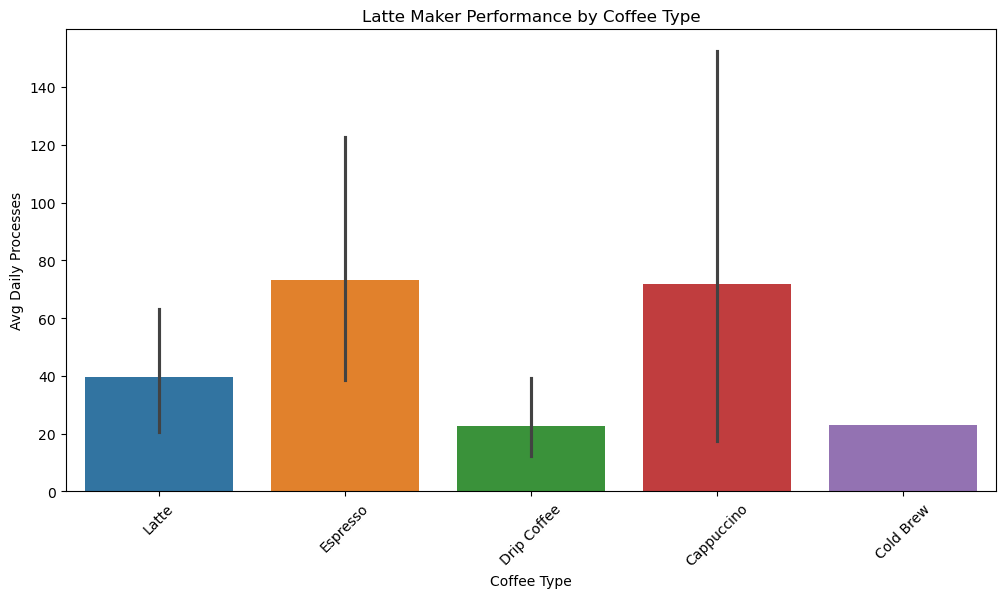

In [256]:
plt.figure(figsize=(12,6))
sns.barplot(data=latte_maker, x="Coffee_Type", y="Avg_Daily_Processes", palette="tab10")
plt.xlabel("Coffee Type")
plt.ylabel("Avg Daily Processes")
plt.title("Latte Maker Performance by Coffee Type")
plt.xticks(rotation=45)
plt.show()

C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\1211579370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coldbrew_pro, x="Coffee_Type", y="Avg_Daily_Processes", palette="tab10")


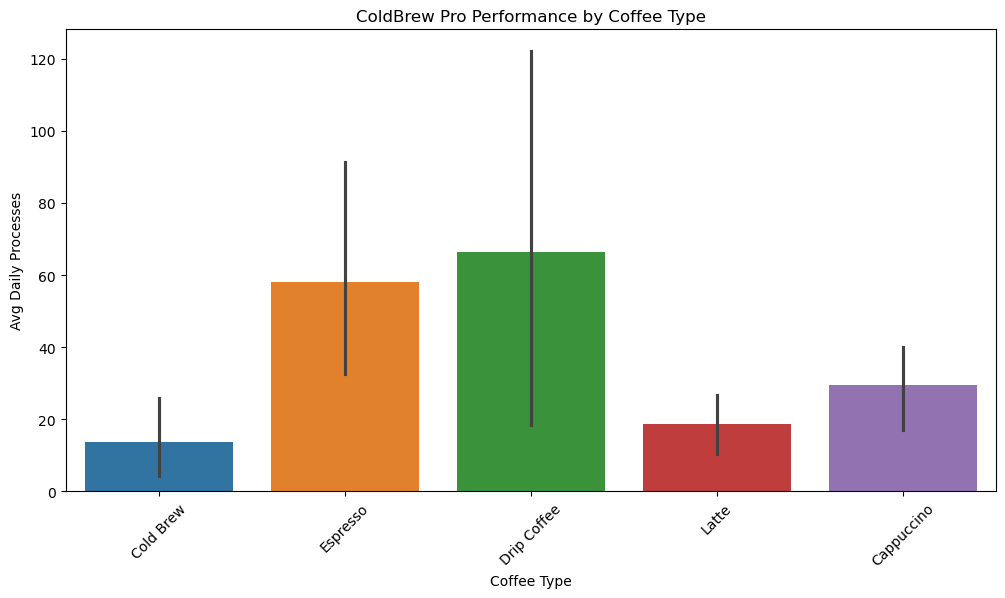

In [257]:
coldbrew_pro = coffee[coffee['Machine_Model'] == 'ColdBrew_Pro']
plt.figure(figsize=(12,6))
sns.barplot(data=coldbrew_pro, x="Coffee_Type", y="Avg_Daily_Processes", palette="tab10")
plt.xlabel("Coffee Type")
plt.ylabel("Avg Daily Processes")
plt.title("ColdBrew Pro Performance by Coffee Type")
plt.xticks(rotation=45)
plt.show()

C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\1660990099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=espresso, x="Coffee_Type", y="Avg_Daily_Processes", palette="tab10")


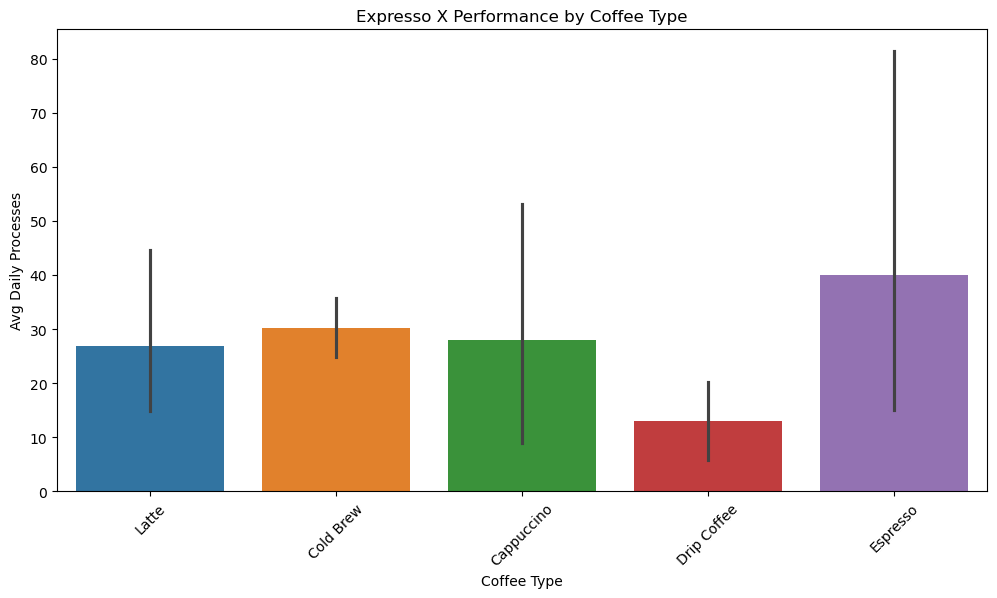

In [258]:
espresso = coffee[coffee['Machine_Model'] == 'Espresso_X']
plt.figure(figsize=(12,6))
sns.barplot(data=espresso, x="Coffee_Type", y="Avg_Daily_Processes", palette="tab10")
plt.xlabel("Coffee Type")
plt.ylabel("Avg Daily Processes")
plt.title("Expresso X Performance by Coffee Type")
plt.xticks(rotation=45)
plt.show()

C:\Users\Premio\AppData\Local\Temp\ipykernel_5432\246154247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=drip_brew, x="Coffee_Type", y="Avg_Daily_Processes", palette="tab10")


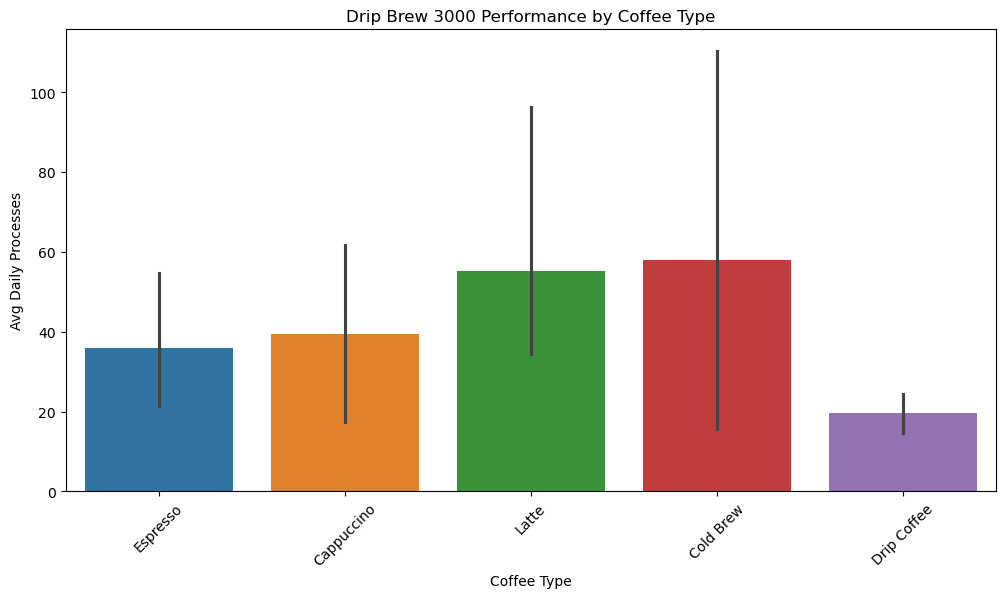

In [259]:
drip_brew = coffee[coffee['Machine_Model'] == 'Drip_Brew_3000']
plt.figure(figsize=(12,6))
sns.barplot(data=drip_brew, x="Coffee_Type", y="Avg_Daily_Processes", palette="tab10")
plt.xlabel("Coffee Type")
plt.ylabel("Avg Daily Processes")
plt.title("Drip Brew 3000 Performance by Coffee Type")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group by machine model and get unique coffee types it can produce
machine_coffee_mapping = coffee.groupby("Machine_Model")["Coffee_Type"].unique()
machine_coffee_mapping

Machine_Model
ColdBrew_Pro      [Cold Brew, Espresso, Drip Coffee, Latte, Capp...
Drip_Brew_3000    [Espresso, Cappuccino, Latte, Cold Brew, Drip ...
Espresso_X        [Latte, Cold Brew, Cappuccino, Drip Coffee, Es...
Latte_Maker       [Latte, Espresso, Drip Coffee, Cappuccino, Col...
Name: Coffee_Type, dtype: object

In [275]:
# Count how many coffee types each machine can produce
machine_coverage = machine_coffee_mapping.apply(len).sort_values(ascending=False)
machine_coverage

Machine_Model
ColdBrew_Pro      5
Drip_Brew_3000    5
Espresso_X        5
Latte_Maker       5
Name: Coffee_Type, dtype: int64

In [276]:
# Display machines that can produce all types of coffee
top_machines = machine_coverage[machine_coverage == machine_coverage.max()].index.tolist()
top_machines

['ColdBrew_Pro', 'Drip_Brew_3000', 'Espresso_X', 'Latte_Maker']

In [277]:
print("Machines that produce all coffee types:", top_machines)

Machines that produce all coffee types: ['ColdBrew_Pro', 'Drip_Brew_3000', 'Espresso_X', 'Latte_Maker']


In [278]:
# Filter dataset for top machines
efficiency_metrics = coffee[coffee["Machine_Model"].isin(top_machines)].groupby("Machine_Model").agg({
    "Utilization_Rate": "mean",
    "Duration_Per_Request": "mean",
    "Avg_Error_Per_Day": "mean"
}).sort_values(by="Utilization_Rate", ascending=False)

# Display efficiency ranking
print(efficiency_metrics)

                Utilization_Rate  Duration_Per_Request  Avg_Error_Per_Day
Machine_Model                                                            
ColdBrew_Pro            8.455333              2.964333           0.014750
Latte_Maker             7.484444              2.059630           0.011826
Espresso_X              7.255161              3.154516           0.012977
Drip_Brew_3000          6.776364              2.475000           0.016223


In [279]:
from itertools import combinations

# Generate all possible two-machine combinations
machine_pairs = list(combinations(top_machines, 2))

# Compute efficiency for each pair
pair_efficiency = []
for m1, m2 in machine_pairs:
    subset = coffee[coffee["Machine_Model"].isin([m1, m2])]
    avg_utilization = subset["Utilization_Rate"].mean()
    avg_duration = subset["Duration_Per_Request"].mean()
    avg_error = subset["Avg_Error_Per_Day"].mean()
    
    pair_efficiency.append((m1, m2, avg_utilization, avg_duration, avg_error))

# Convert to DataFrame and sort by highest utilization rate
pair_efficiency_df = pd.DataFrame(pair_efficiency, columns=["Machine_1", "Machine_2", "Avg_Utilization", "Avg_Duration", "Avg_Error"])
pair_efficiency_df = pair_efficiency_df.sort_values(by="Avg_Utilization", ascending=False)

# Display the best machine combinations
print(pair_efficiency_df)

        Machine_1       Machine_2  Avg_Utilization  Avg_Duration  Avg_Error
2    ColdBrew_Pro     Latte_Maker         7.995439      2.535789   0.013365
1    ColdBrew_Pro      Espresso_X         7.845410      3.060984   0.013849
0    ColdBrew_Pro  Drip_Brew_3000         7.745000      2.757308   0.015373
5      Espresso_X     Latte_Maker         7.361897      2.644828   0.012441
4  Drip_Brew_3000     Latte_Maker         7.166531      2.246122   0.013800
3  Drip_Brew_3000      Espresso_X         7.056415      2.872453   0.014325


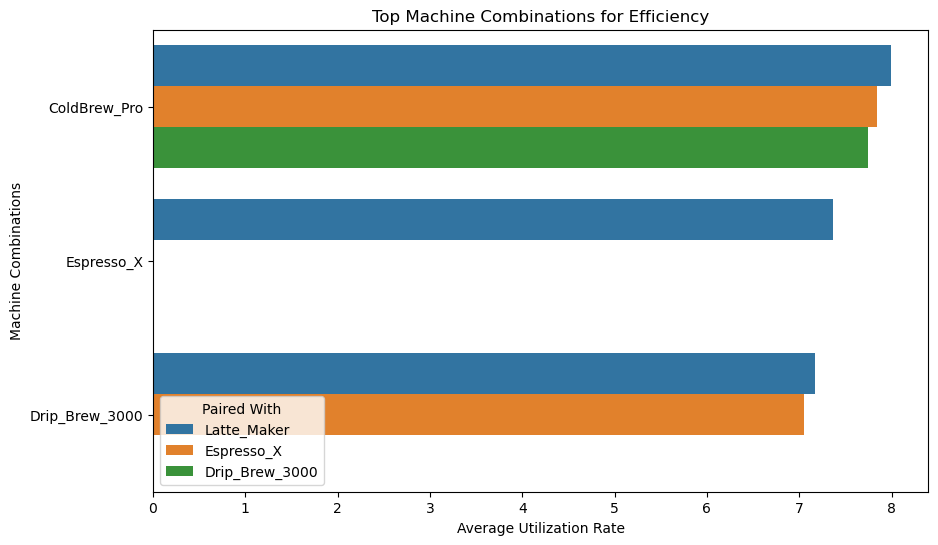

In [280]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Avg_Utilization", y="Machine_1", hue="Machine_2", data=pair_efficiency_df)
plt.xlabel("Average Utilization Rate")
plt.ylabel("Machine Combinations")
plt.title("Top Machine Combinations for Efficiency")
plt.legend(title="Paired With")
plt.show()

RESULT

BASED ON THE AMALYSIS THE STORE CAN UTILIZE JUST TWO OF THE MACHINES MODEL TO CUT THE COST OF MAINTENANCE OF FOUR MACHINES MODEL AND MAXIMIZE THE PRODUCTIVITY

ColdBrew_Pro + Latte Maker IS LIKELY THE BEST COMBINATIONS BASED ON UTILIZATION RATE, DURATION, AND ERROR

In [260]:
data['Last_Maintenance_Date'].fillna(data['Last_Maintenance_Date'].mode()[0],  inplace=True)

In [261]:
data['Machine_Model'].fillna(data['Machine_Model'].mode()[0],  inplace=True)

In [262]:
data[data.isna().any(axis=1)]

,Store_ID,Machine_ID,Machine_Model,Total_Sales,Coffee_Type,Days_In_Operation,Avg_Daily_Processes,Duration_Per_Request,Total_Minutes_Per_Day,Total_Hours_Per_Day,Maintenance_Needed,Last_Maintenance_Date,Utilization_Rate,Avg_Error_Per_Day


In [263]:
data.isnull().sum()

Store_ID                 0
Machine_ID               0
Machine_Model            0
Total_Sales              0
Coffee_Type              0
Days_In_Operation        0
Avg_Daily_Processes      0
Duration_Per_Request     0
Total_Minutes_Per_Day    0
Total_Hours_Per_Day      0
Maintenance_Needed       0
Last_Maintenance_Date    0
Utilization_Rate         0
Avg_Error_Per_Day        0
dtype: int64

In [264]:
data['Duration_Per_Request']

0      2.51
1      0.50
2      1.13
3      3.23
4      0.94
       ... 
105    3.25
106    4.45
107    0.96
108    3.37
109    2.51
Name: Duration_Per_Request, Length: 110, dtype: float64

In [265]:
data.dropna(inplace=True)

In [266]:
store_a = data[data['Store_ID'] == 'Store_A']
store_a

,Store_ID,Machine_ID,Machine_Model,Total_Sales,Coffee_Type,Days_In_Operation,Avg_Daily_Processes,Duration_Per_Request,Total_Minutes_Per_Day,Total_Hours_Per_Day,Maintenance_Needed,Last_Maintenance_Date,Utilization_Rate,Avg_Error_Per_Day
4,Store_A,Machine_60,Latte_Maker,8013,Latte,294,27.26,0.94,25.6244,0.43,False,2/1/2025,1.79,0.0102
7,Store_A,Machine_62,ColdBrew_Pro,8416,Cold Brew,237,35.51,1.72,61.0772,1.02,False,2/1/2025,4.25,0.0127
15,Store_A,Machine_27,Latte_Maker,6364,Espresso,145,43.89,1.87,82.0743,1.37,False,2/1/2025,5.71,0.0276
16,Store_A,Machine_51,Latte_Maker,2498,Drip Coffee,181,13.80,1.26,17.3880,0.29,False,2/1/2025,1.21,0.0166
17,Store_A,Machine_62,Espresso_X,1791,Latte,81,22.11,1.63,36.0393,0.60,False,2/1/2025,2.50,0.0000
18,Store_A,Machine_59,Espresso_X,1354,Latte,159,8.52,1.75,14.9100,0.25,False,1/15/2025,1.04,0.0063
22,Store_A,Machine_11,ColdBrew_Pro,6034,Espresso,180,33.52,4.45,149.1640,2.49,False,2/10/2025,10.38,0.0056
23,Store_A,Machine_60,Espresso_X,5048,Latte,333,15.16,4.55,68.9780,1.15,False,2/1/2025,4.79,0.0060
27,Store_A,Machine_33,ColdBrew_Pro,7393,Drip Coffee,51,144.96,3.15,456.6240,7.61,False,2/1/2025,31.71,0.0392
31,Store_A,Machine_67,ColdBrew_Pro,6354,Latte,310,20.50,4.30,88.1500,1.47,False,2/1/2025,6.12,0.0032


In [267]:
store_a.groupby(['Machine_ID','Machine_Model', 'Coffee_Type'])['Avg_Daily_Processes'].sum()

Machine_ID  Machine_Model   Coffee_Type
Machine_11  ColdBrew_Pro    Espresso        67.04
Machine_12  Drip_Brew_3000  Espresso        19.56
Machine_18  ColdBrew_Pro    Espresso        26.85
Machine_27  Latte_Maker     Espresso        43.89
Machine_32  Latte_Maker     Drip Coffee     62.41
Machine_33  ColdBrew_Pro    Drip Coffee    144.96
            Espresso_X      Drip Coffee      5.72
Machine_39  Espresso_X      Cappuccino       4.58
Machine_40  ColdBrew_Pro    Drip Coffee     17.10
Machine_51  Latte_Maker     Drip Coffee     13.80
Machine_53  Espresso_X      Latte           13.78
Machine_59  Espresso_X      Latte            8.52
Machine_6   Latte_Maker     Latte           22.54
Machine_60  Espresso_X      Latte           15.16
            Latte_Maker     Latte           27.26
Machine_62  ColdBrew_Pro    Cold Brew       35.51
            Espresso_X      Latte           22.11
Machine_63  Espresso_X      Espresso        11.01
Machine_67  ColdBrew_Pro    Latte           20.50
Machine_7 

In [268]:
productivity = store_a.groupby(['Machine_ID',"Machine_Model", "Coffee_Type"])[["Total_Sales", 'Avg_Daily_Processes']].mean().reset_index()
productivity.sort_values(by='Coffee_Type')

,Machine_ID,Machine_Model,Coffee_Type,Total_Sales,Avg_Daily_Processes
23,Machine_98,Espresso_X,Cappuccino,2500.0,7.35
7,Machine_39,Espresso_X,Cappuccino,1004.0,4.58
22,Machine_92,ColdBrew_Pro,Cappuccino,7333.0,40.51
20,Machine_71,Espresso_X,Cold Brew,3641.0,22.61
15,Machine_62,ColdBrew_Pro,Cold Brew,8416.0,35.51
4,Machine_32,Latte_Maker,Drip Coffee,7739.0,62.41
5,Machine_33,ColdBrew_Pro,Drip Coffee,7393.0,144.96
6,Machine_33,Espresso_X,Drip Coffee,1424.0,5.72
8,Machine_40,ColdBrew_Pro,Drip Coffee,5968.0,17.10
9,Machine_51,Latte_Maker,Drip Coffee,2498.0,13.80


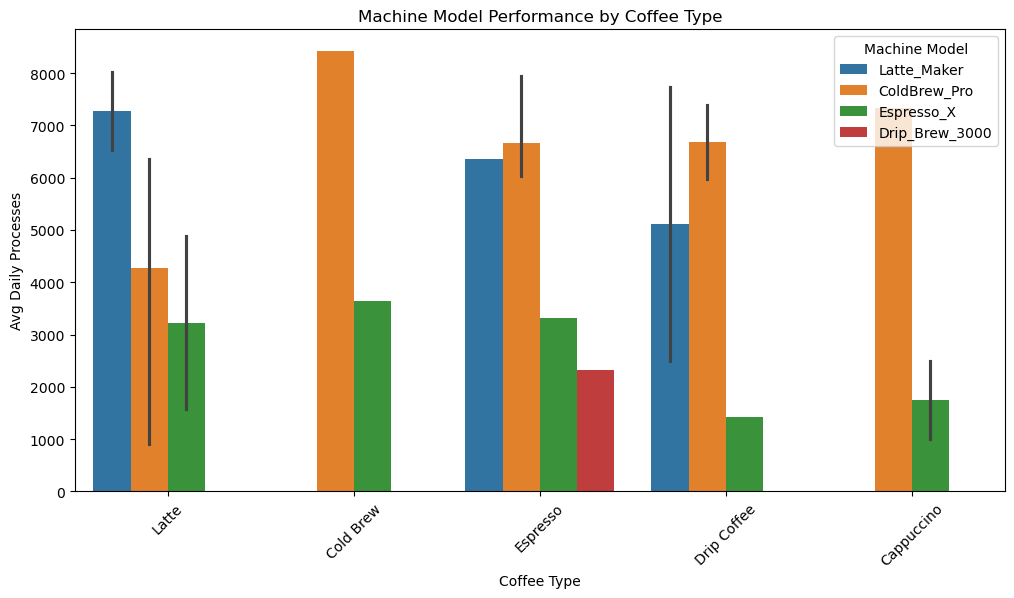

In [269]:
plt.figure(figsize=(12,6))
sns.barplot(data=store_a, x="Coffee_Type", y="Total_Sales", hue="Machine_Model", palette="tab10")
plt.xlabel("Coffee Type")
plt.ylabel("Avg Daily Processes")
plt.title("Machine Model Performance by Coffee Type")
plt.xticks(rotation=45)
plt.legend(title="Machine Model")
plt.show()


In [270]:
data['Total_Sales'].sum()

583927